In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [2]:
url = 'https://raw.githubusercontent.com/useless1801/prac/main/diabetes.csv'
df = pd.read_csv(url)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())


In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']




In [7]:
X.astype(int)
y.astype(int)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [34]:
random_forest = RandomForestClassifier()
svm = SVC(probability=True)
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression(random_state=42)

In [36]:
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [37]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1score, roc_auc

In [39]:
results = []
models = [
    ('Logistic Regression',logistic_regression),
    ('Random Forest', random_forest),
    ('SVM', svm),
    ('KNN', knn),
]
for model_name, model in models:
    accuracy, precision, recall, f1score, roc_auc = evaluate_model(model, X_test, y_test)
    results.append({
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1score': f1score,
        'roc_auc': roc_auc
    })


results_df = pd.DataFrame(results)


results_df.set_index('model', inplace=True)

print(results_df)

                     accuracy  precision    recall   f1score   roc_auc
model                                                                 
Logistic Regression  0.766234   0.686275  0.636364  0.660377  0.737374
Random Forest        0.753247   0.649123  0.672727  0.660714  0.735354
SVM                  0.733766   0.645833  0.563636  0.601942  0.695960
KNN                  0.766234   0.661017  0.709091  0.684211  0.753535


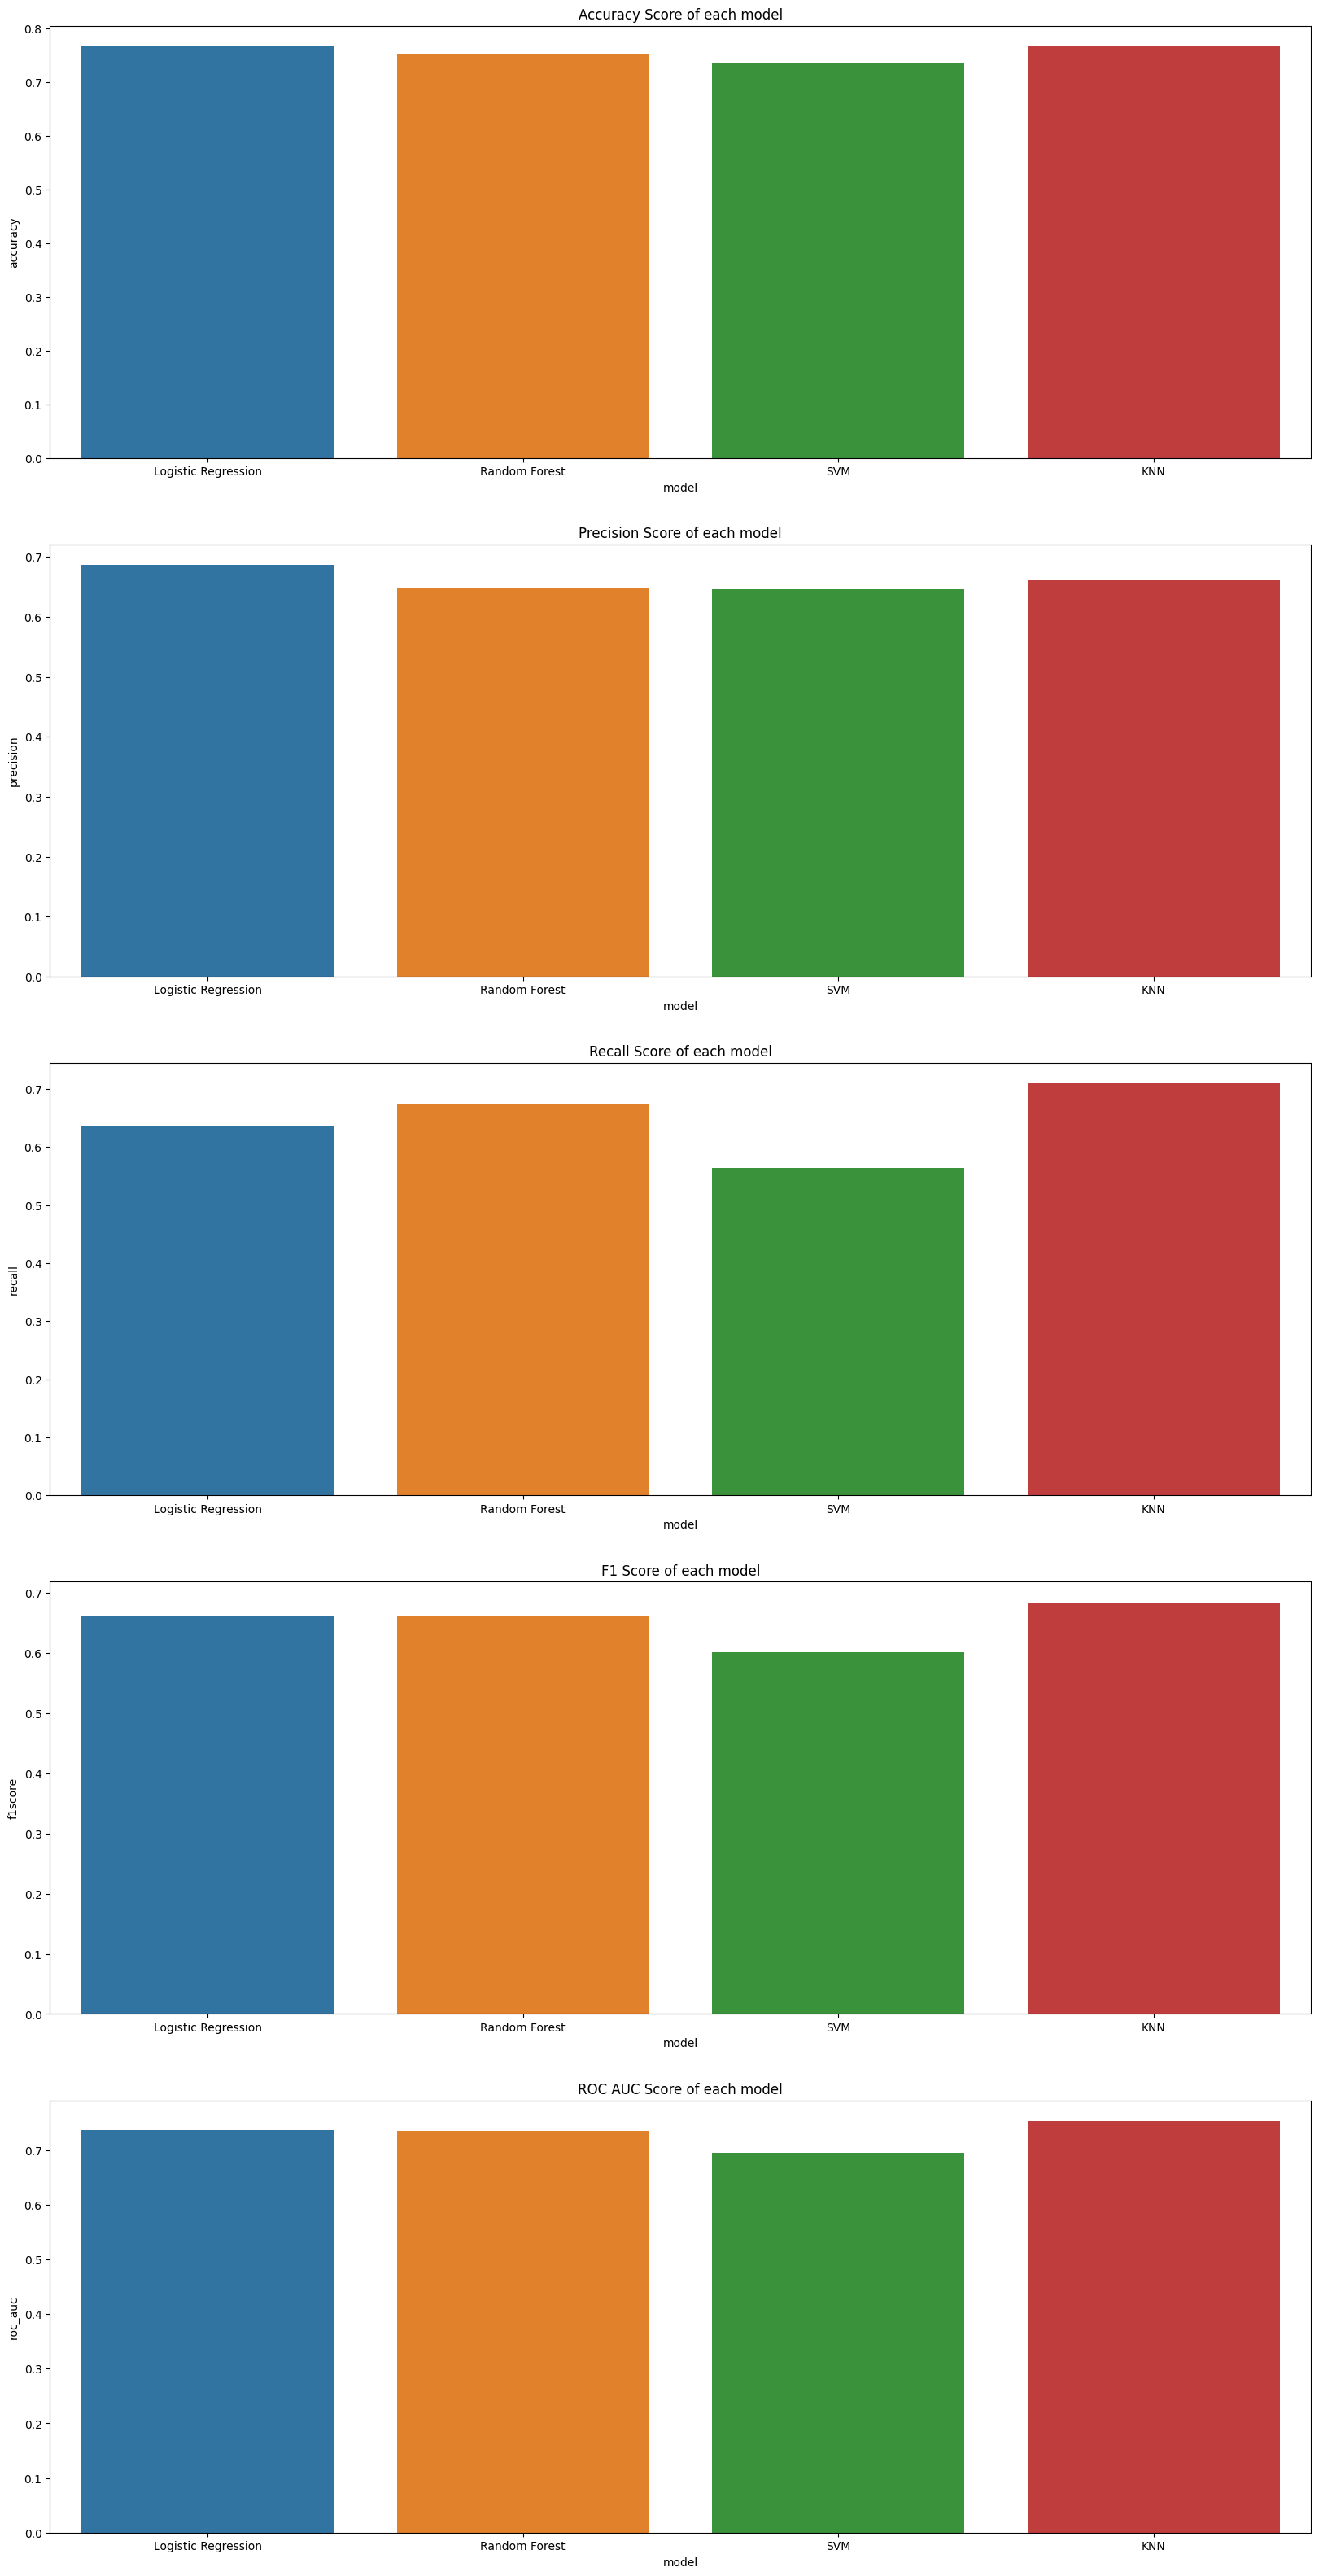

In [41]:
fig, ax = plt.subplots(5, 1, figsize=(20, 40))
sns.barplot(x=results_df.index, y='accuracy', data=results_df, ax=ax[0])
sns.barplot(x=results_df.index, y='precision', data=results_df, ax=ax[1])
sns.barplot(x=results_df.index, y='recall', data=results_df, ax=ax[2])
sns.barplot(x=results_df.index, y='f1score', data=results_df, ax=ax[3])
sns.barplot(x=results_df.index, y='roc_auc', data=results_df, ax=ax[4])

# set the title of each plot
ax[0].set_title('Accuracy Score of each model')
ax[1].set_title('Precision Score of each model')
ax[2].set_title('Recall Score of each model')
ax[3].set_title('F1 Score of each model')
ax[4].set_title('ROC AUC Score of each model')


plt.show()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
model = logistic_regression = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


In [47]:
accuracy

0.7662337662337663

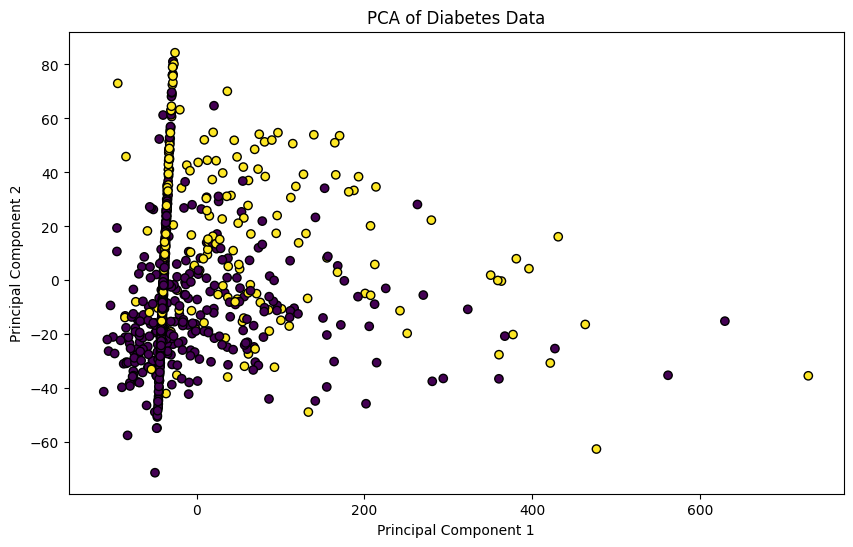

In [49]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA of Diabetes Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [50]:
import pickle
pickle.dump(model, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[5, 130, 70,30,100,25,0.5,35]]))

[1]
